<a href="https://colab.research.google.com/github/sahug/time-series/blob/main/TSA%20-%20Basics%20-%20Modeling%20using%20StatsModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TSA - Basics - Modeling using StatsModels**

**Import Datasets**

In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d szrlee/stock-time-series-20050101-to-20171231
!kaggle datasets download -d selfishgene/historical-hourly-weather-data

  0% 0.00/3.03M [00:00<?, ?B/s]
100% 3.03M/3.03M [00:00<00:00, 176MB/s]
 75% 9.00M/12.0M [00:00<00:00, 71.9MB/s]
100% 12.0M/12.0M [00:00<00:00, 89.2MB/s]


**Unzip**

In [5]:
import zipfile
with zipfile.ZipFile("/content/stock-time-series-20050101-to-20171231.zip", "r") as zip:
  zip.extractall("/content/")

with zipfile.ZipFile("/content/historical-hourly-weather-data.zip", "r") as zip:
  zip.extractall("/content/")  

**Load Dataset**

In [6]:
import pandas as pd

In [131]:
google = pd.read_csv("/content/GOOGL_2006-01-01_to_2018-01-01.csv", index_col='Date', parse_dates=['Date'])
microsoft = pd.read_csv("/content/MSFT_2006-01-01_to_2018-01-01.csv", index_col='Date', parse_dates=['Date'])
humidity = pd.read_csv("/content/humidity.csv", index_col='datetime', parse_dates=['datetime'])

In [21]:
google.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


**Data Preperation**

In [134]:
humidity = humidity.iloc[1:]
humidity = humidity.fillna(method="ffill")
humidity.isna().sum()

Vancouver            0
Portland             0
San Francisco        0
Seattle              0
Los Angeles          0
San Diego            0
Las Vegas            0
Phoenix              0
Albuquerque          0
Denver               0
San Antonio          0
Dallas               0
Houston              0
Kansas City          0
Minneapolis          0
Saint Louis          0
Chicago              0
Nashville            0
Indianapolis         0
Atlanta              0
Detroit              0
Jacksonville         0
Charlotte            0
Miami                0
Pittsburgh           0
Toronto              0
Philadelphia         0
New York             0
Montreal             0
Boston               0
Beersheba            0
Tel Aviv District    0
Eilat                0
Haifa                0
Nahariyya            0
Jerusalem            0
dtype: int64

In [11]:
google.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64

**Visualization**

In [ ]:
import matplotlib.pyplot as plt

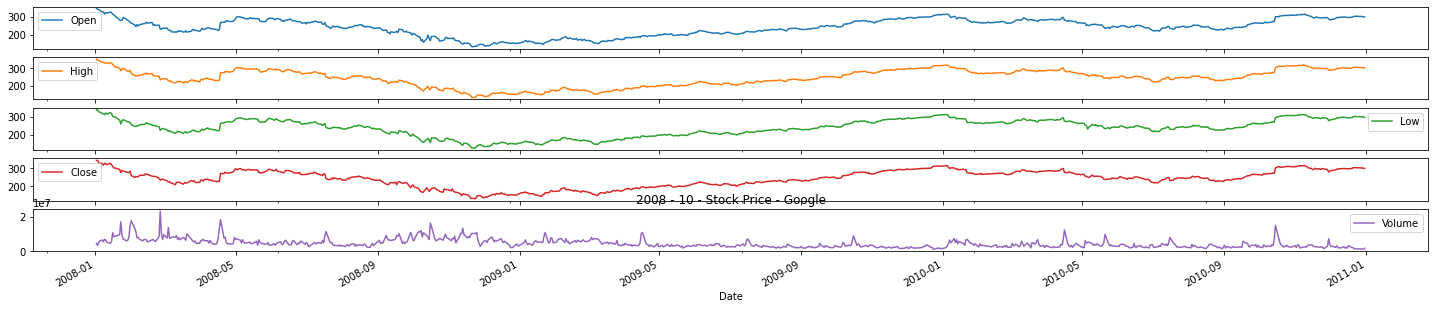

In [55]:
google["2008":"2010"].plot(subplots=True, figsize=(25, 5))
plt.title("2008 - 10 - Stock Price - Google")
plt.show()

**AR Model**

An AutoreRressive (AR) Model is a representation of a type of random process, as such, it is used to describe certain time-varying processes in nature, economics, etc. 

In [111]:
import numpy as np
from pylab import rcParams
from statsmodels.tsa.arima_process import ArmaProcess

We choose -
- AR -> 1 to -0.9 
- MA -> 1

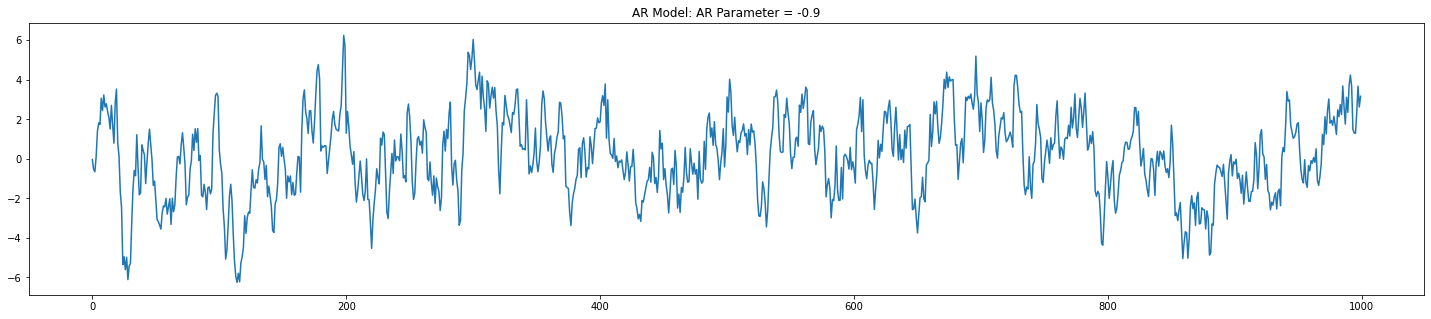

In [119]:
ar = np.array([1, -0.9])
ma = np.array([1])
ap = ArmaProcess(ar, ma)
sim = ap.generate_sample(nsample=1000)
plt.title('AR Model: AR Parameter = -0.9')
plt.plot(sim)

We choose -
- AR -> 1 to 0.9 
- MA -> 1

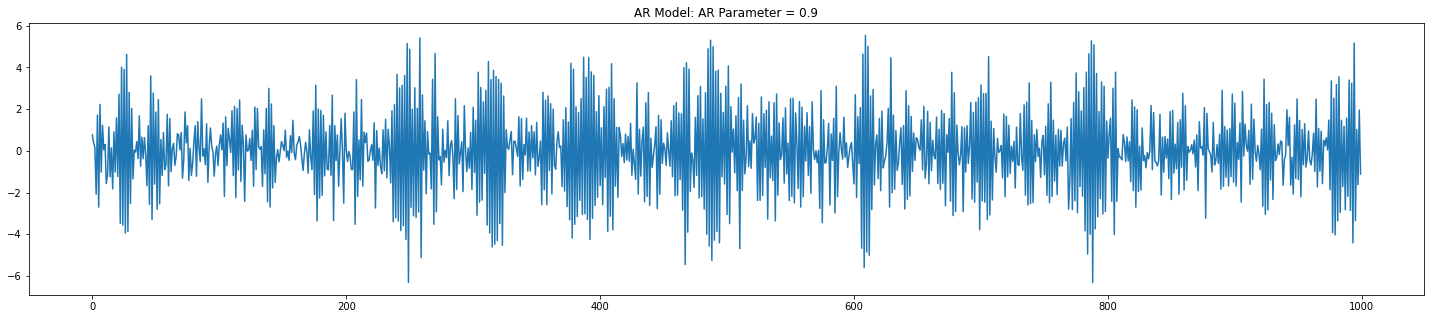

In [120]:
ar = np.array([1, 0.9])
ma = np.array([1])
ap = ArmaProcess(ar, ma)
sim = ap.generate_sample(nsample=1000)
plt.title('AR Model: AR Parameter = 0.9')
plt.plot(sim)

We choose -
- AR -> 2 to -0.9 
- MA -> 1

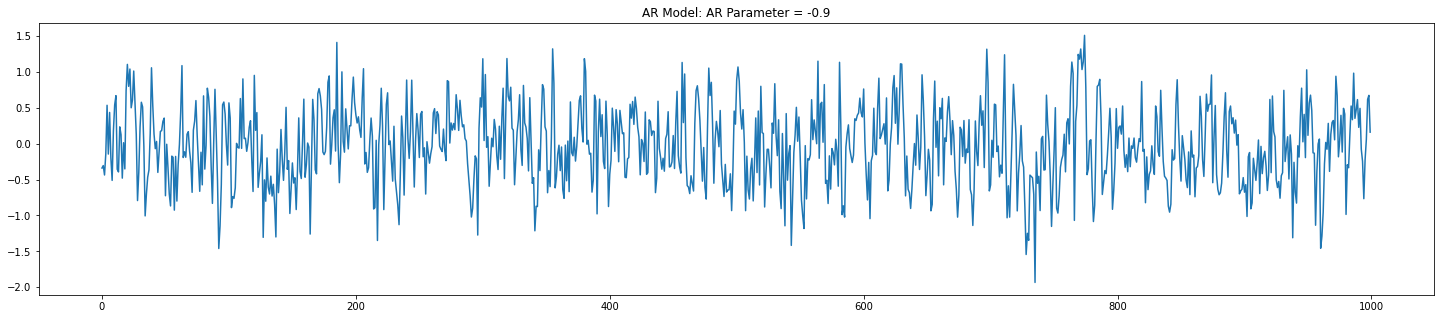

In [121]:
ar = np.array([2, -0.9])
ma = np.array([1])
ap = ArmaProcess(ar, ma)
sim = ap.generate_sample(nsample=1000)
plt.title('AR Model: AR Parameter = -0.9')
plt.plot(sim)

We choose -
- AR -> 2 to 0.9 
- MA -> 1

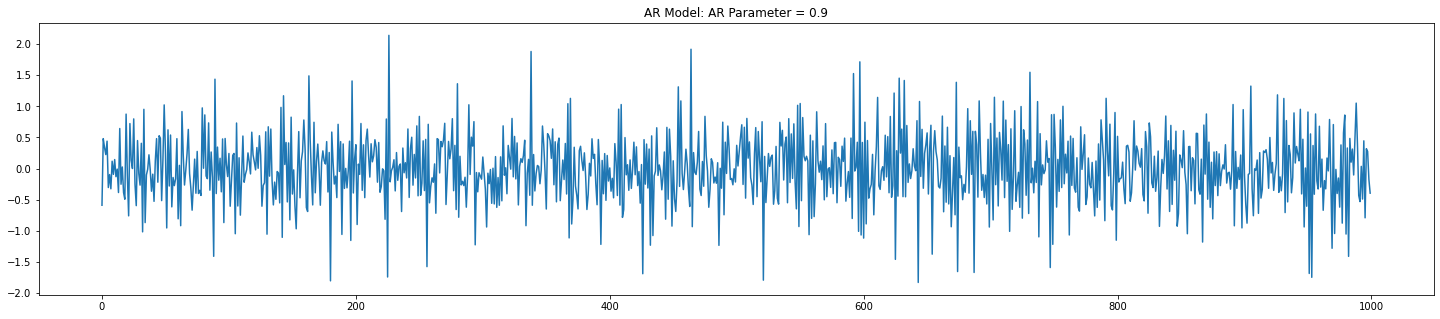

In [122]:
ar = np.array([2, 0.9])
ma = np.array([1])
ap = ArmaProcess(ar, ma)
sim = ap.generate_sample(nsample=1000)
plt.title('AR Model: AR Parameter = 0.9')
plt.plot(sim)

**Forecasting**

In [123]:
from statsmodels.tsa.arima_model import ARMA

In [124]:
model = ARMA(sim, order=(1,0))
result = model.fit()
print(result.summary())
print("μ={} ,ϕ={}".format(result.params[0],result.params[1]))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(1, 0)   Log Likelihood                -739.773
Method:                       css-mle   S.D. of innovations              0.507
Date:                Thu, 09 Jun 2022   AIC                           1485.546
Time:                        04:17:02   BIC                           1500.269
Sample:                             0   HQIC                          1491.141
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0037      0.011     -0.330      0.742      -0.026       0.018
ar.L1.y       -0.4354      0.028    -15.293      0.000      -0.491      -0.380
                                    Roots           

**Predicting**

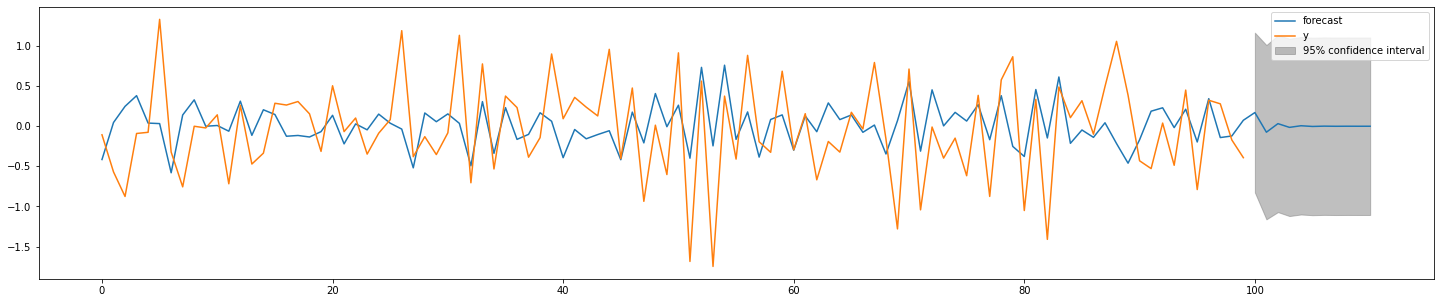

In [125]:
result.plot_predict(start=900, end=1010)
plt.show()

In [129]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(sim[900:1011], result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 0.5653330306102033.


Predicting Humidity level of Montreal

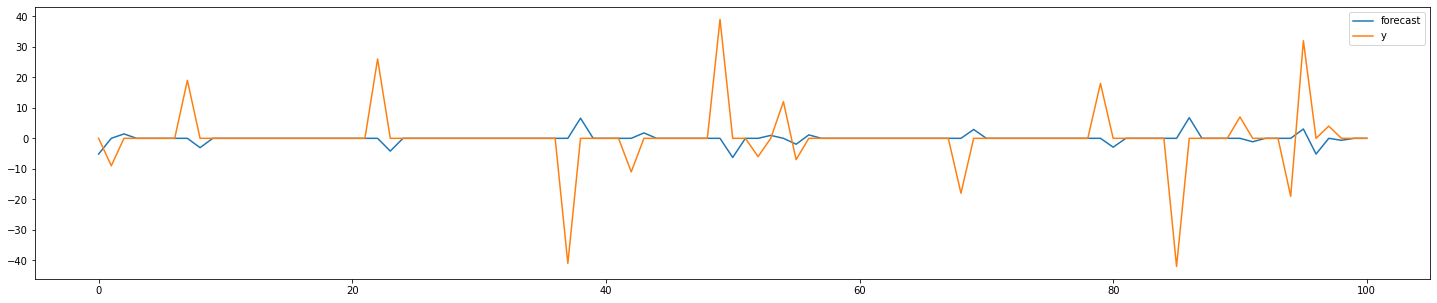

In [135]:
humid = ARMA(humidity["Montreal"].diff().iloc[1:].values, order=(1,0))
res = humid.fit()
res.plot_predict(start=1000, end=1100)
plt.show()

In [136]:
rmse = math.sqrt(mean_squared_error(humidity["Montreal"].diff().iloc[900:1000].values, result.predict(start=900,end=999)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 6.948056392881528.


Predicting Closing prices of Google

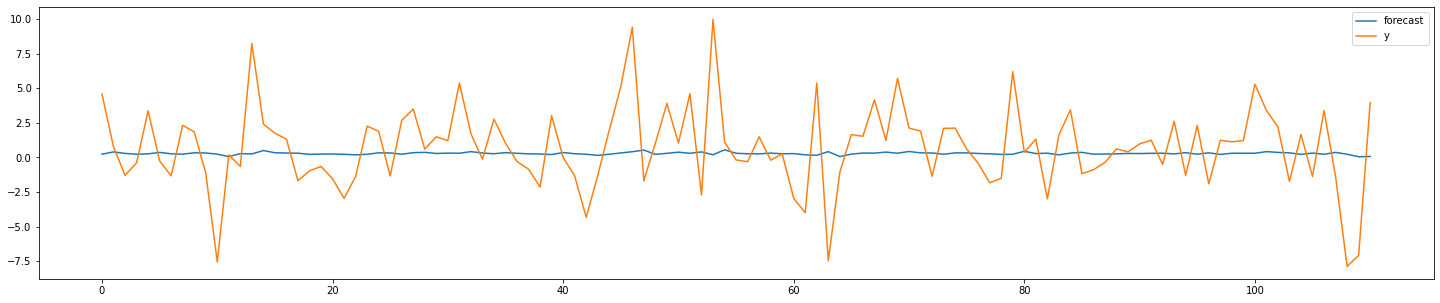

In [137]:
goog = ARMA(google["Close"].diff().iloc[1:].values, order=(1,0))
res = goog.fit()
res.plot_predict(start=900, end=1010)
plt.show()

**MA Model**

The Moving - Average (MA) Model is a common approach for modeling univariate time series. The moving-average model specifies that the output variable depends linearly on the current and various past values of a stochastic (imperfectly predictable) term.

We choose -
- AR -> 1
- MA -> 1 to -0.5

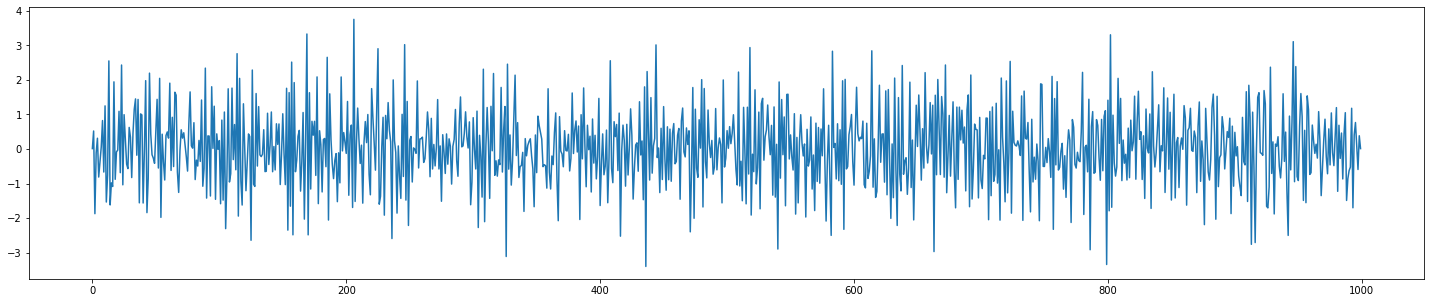

In [140]:
rcParams['figure.figsize'] = 25, 5
ar = np.array([1])
ma = np.array([1, -0.5])
ap = ArmaProcess(ar, ma)
sim = ap.generate_sample(nsample=1000)
plt.plot(sim)

**Forecasting**

In [141]:
model = ARMA(sim, order=(0,1))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 1000
Model:                     ARMA(0, 1)   Log Likelihood               -1442.628
Method:                       css-mle   S.D. of innovations              1.024
Date:                Thu, 09 Jun 2022   AIC                           2891.256
Time:                        04:24:38   BIC                           2905.979
Sample:                             0   HQIC                          2896.852
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0321      0.018      1.832      0.067      -0.002       0.066
ma.L1.y       -0.4590      0.027    -16.792      0.000      -0.513      -0.405
                                    Roots           

**Prediction**

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                45251
Model:                     ARMA(0, 3)   Log Likelihood             -153516.982
Method:                       css-mle   S.D. of innovations              7.197
Date:                Thu, 09 Jun 2022   AIC                         307043.965
Time:                        04:25:00   BIC                         307087.564
Sample:                             0   HQIC                        307057.686
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0008      0.031     -0.025      0.980      -0.061       0.060
ma.L1.y       -0.1621      0.005    -34.507      0.000      -0.171      -0.153
ma.L2.y        0.0386      0.005      8.316      0.0

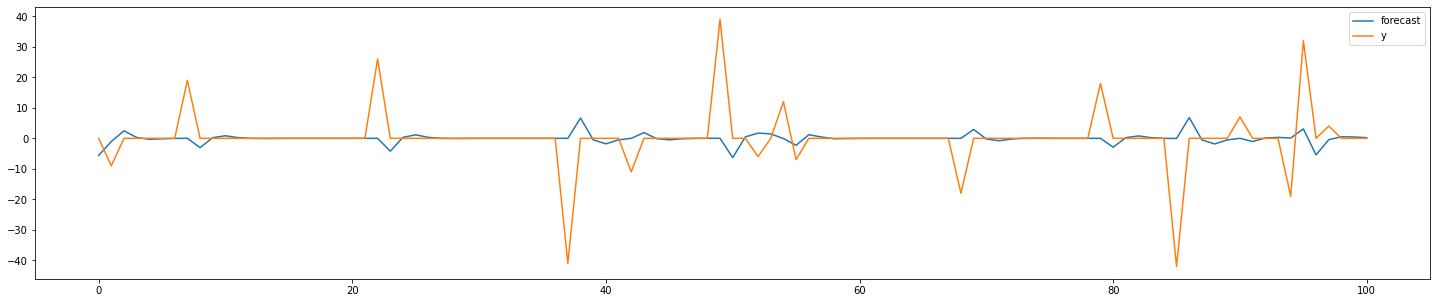

In [142]:
model = ARMA(humidity["Montreal"].diff().iloc[1:].values, order=(0,3))
result = model.fit()
print(result.summary())
print("μ={} ,θ={}".format(result.params[0],result.params[1]))
result.plot_predict(start=1000, end=1100)
plt.show()

In [143]:
rmse = math.sqrt(mean_squared_error(humidity["Montreal"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 11.34512804398336.


**ARMA Models**

Autoregressive – Moving - Average (ARMA) Models provide a parsimonious description of a (weakly) stationary stochastic process in terms of two polynomials, one for the autoregression and the second for the moving average. It's the fusion of AR and MA models.

**Prediction**

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 3018
Model:                     ARMA(3, 3)   Log Likelihood              -55408.974
Method:                       css-mle   S.D. of innovations       22751608.120
Date:                Thu, 09 Jun 2022   AIC                         110833.948
Time:                        04:26:36   BIC                         110882.047
Sample:                             0   HQIC                        110851.244
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.03e+04   9915.705     -2.047      0.041   -3.97e+04    -862.777
ar.L1.y        0.2053      0.160      1.287      0.198      -0.107       0.518
ar.L2.y        0.7297      0.179      4.080      0.0

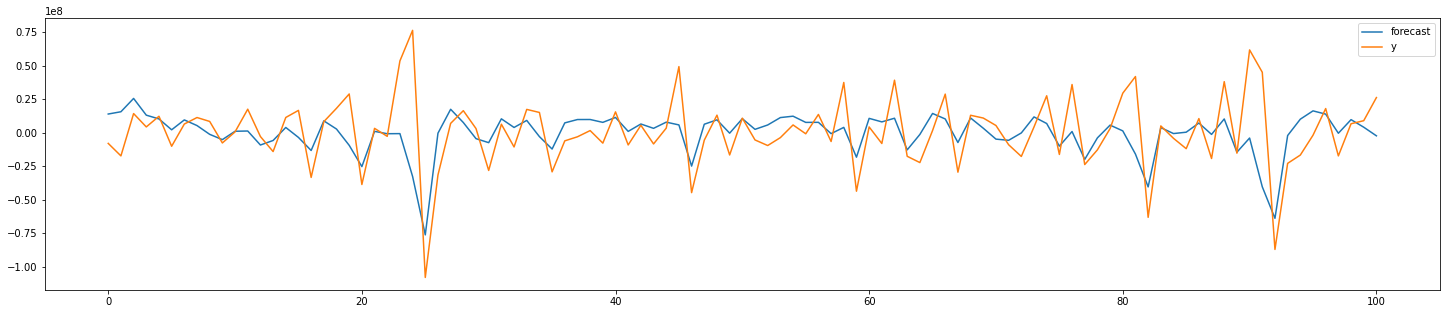

In [144]:
model = ARMA(microsoft["Volume"].diff().iloc[1:].values, order=(3,3))
result = model.fit()
print(result.summary())
print("μ={}, ϕ={}, θ={}".format(result.params[0],result.params[1],result.params[2]))
result.plot_predict(start=1000, end=1100)
plt.show()

In [145]:
rmse = math.sqrt(mean_squared_error(microsoft["Volume"].diff().iloc[1000:1101].values, result.predict(start=1000,end=1100)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 38038339.07370526.


**ARIMA Models**

An AutoRegressive Integrated Moving Average (ARIMA) Model is a generalization of an autoregressive moving average (ARMA) model. Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting). A

In [147]:
from statsmodels.tsa.arima_model import ARIMA

**Prediction**

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                 3017
Model:                 ARIMA(2, 1, 0)   Log Likelihood              -56385.467
Method:                       css-mle   S.D. of innovations       31647215.011
Date:                Thu, 09 Jun 2022   AIC                         112778.933
Time:                        04:28:31   BIC                         112802.981
Sample:                             1   HQIC                        112787.581
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9984.0302   2.48e+05      0.040      0.968   -4.75e+05    4.95e+05
ar.L1.D.y     -0.8716      0.016    -53.758      0.000      -0.903      -0.840
ar.L2.D.y     -0.4551      0.016    -28.071      0.0

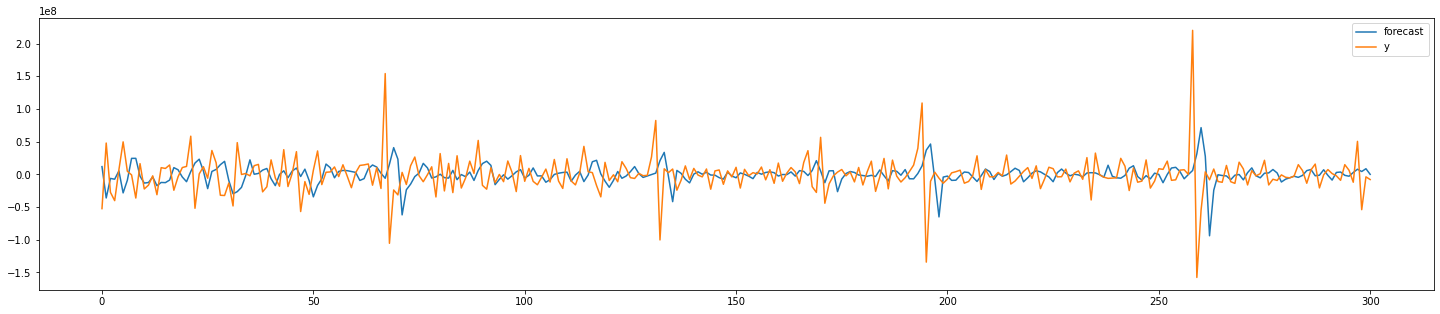

In [149]:
rcParams['figure.figsize'] = 25, 5
model = ARIMA(microsoft["Volume"].diff().iloc[1:].values, order=(2,1,0))
result = model.fit()
print(result.summary())
result.plot_predict(start=700, end=1000)
plt.show()

In [150]:
rmse = math.sqrt(mean_squared_error(microsoft["Volume"].diff().iloc[700:1001].values, result.predict(start=700,end=1000)))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 61937609.59903903.


**VAR Models**

Vector AutoRegression (VAR) is a stochastic process model used to capture the linear interdependencies among multiple time series. VAR models generalize the univariate autoregressive model (AR model) by allowing for more than one evolving variable.

In [153]:
import statsmodels.api as sm

**Prediction**

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/varmax.py:159: EstimationWarning:

Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                           Statespace Model Results                           
Dep. Variable:     ['Close', 'Close']   No. Observations:                 3018
Model:                     VARMA(2,1)   Log Likelihood              -12185.173
                          + intercept   AIC                          24404.346
Date:                Thu, 09 Jun 2022   BIC                          24506.556
Time:                        04:30:22   HQIC                         24441.099
Sample:                             0                                         
                               - 3018                                         
Covariance Type:                  opg                                         
Ljung-Box (Q):                77.67, 78.76   Jarque-Bera (JB):   48240.56, 14927.64
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         3.32, 1.62   Skew:                      1.15, -0.03
Prob(H) (two-sided):            0.00,

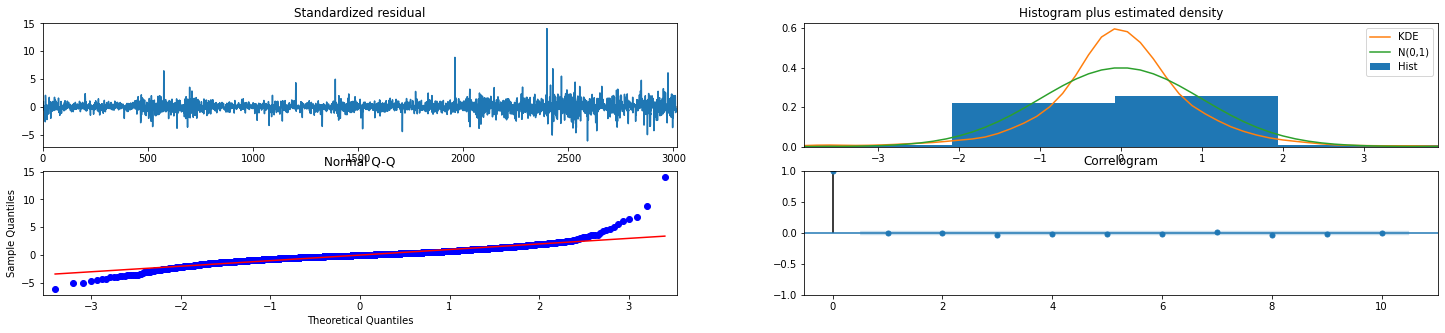

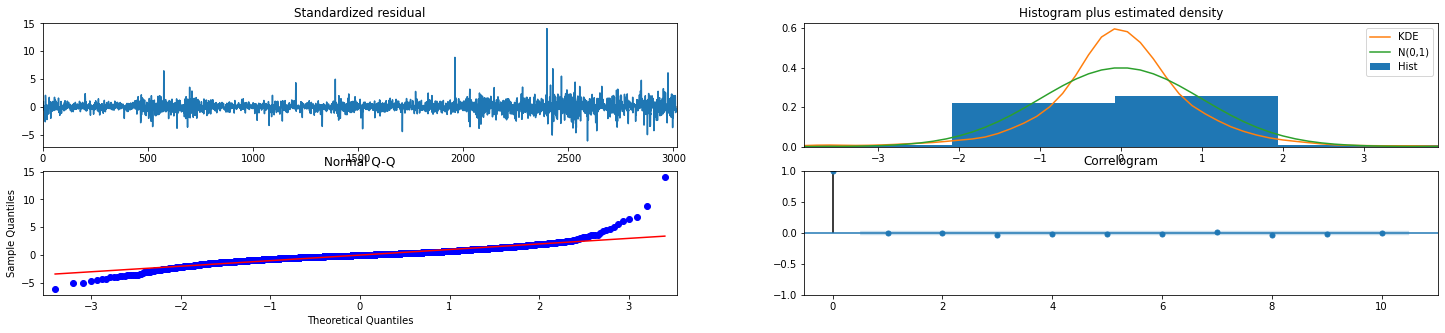

In [151]:
train_sample = pd.concat([google["Close"].diff().iloc[1:],microsoft["Close"].diff().iloc[1:]],axis=1)
model = sm.tsa.VARMAX(train_sample,order=(2,1),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()

In [152]:
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 3.6742341264004414.


**SARIMA Models**

SARIMA Models are useful for modeling seasonal time series, in which the mean and other statistics for a given season are not stationary across the years. The SARIMA model defined constitutes a straightforward extension of the nonseasonal autoregressive-moving average (ARMA) and autoregressive integrated moving average (ARIMA) models presented

**Prediction**

                           Statespace Model Results                           
Dep. Variable:                      y   No. Observations:                 3018
Model:               SARIMAX(4, 0, 4)   Log Likelihood              -10098.399
Date:                Thu, 09 Jun 2022   AIC                          20216.797
Time:                        04:31:50   BIC                          20276.921
Sample:                             0   HQIC                         20238.417
                               - 3018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1059      0.048      2.222      0.026       0.012       0.199
ar.L1          0.2282      0.007     34.543      0.000       0.215       0.241
ar.L2          1.1218      0.006    203.282      0.0

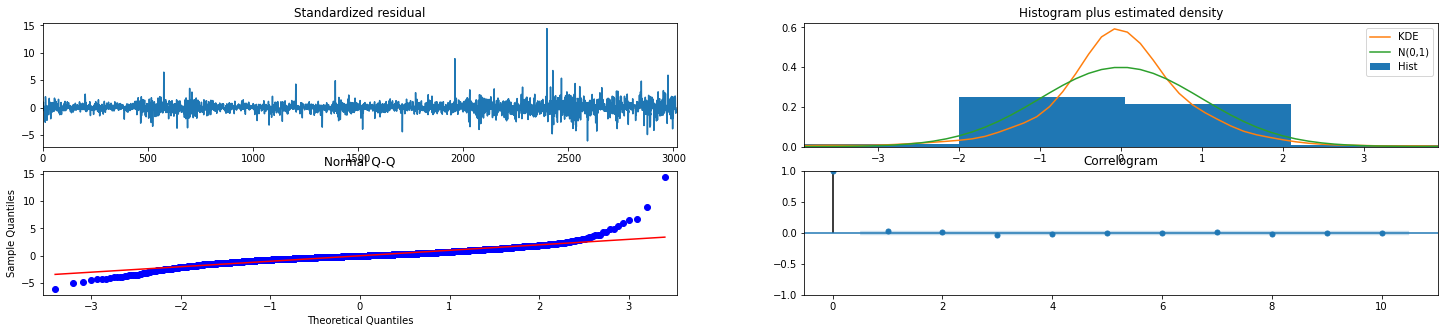

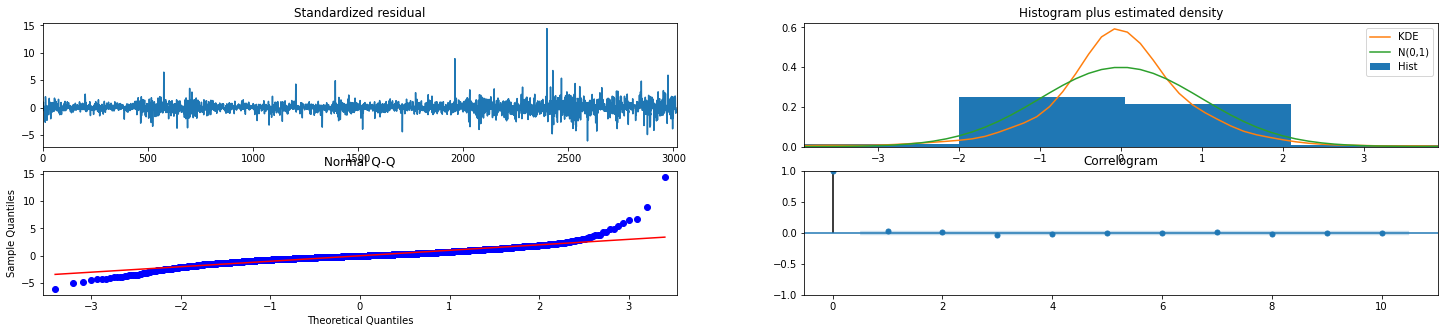

In [154]:
train_sample = google["Close"].diff().iloc[1:].values
model = sm.tsa.SARIMAX(train_sample,order=(4,0,4),trend='c')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()

In [155]:
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 4.380083001462716.


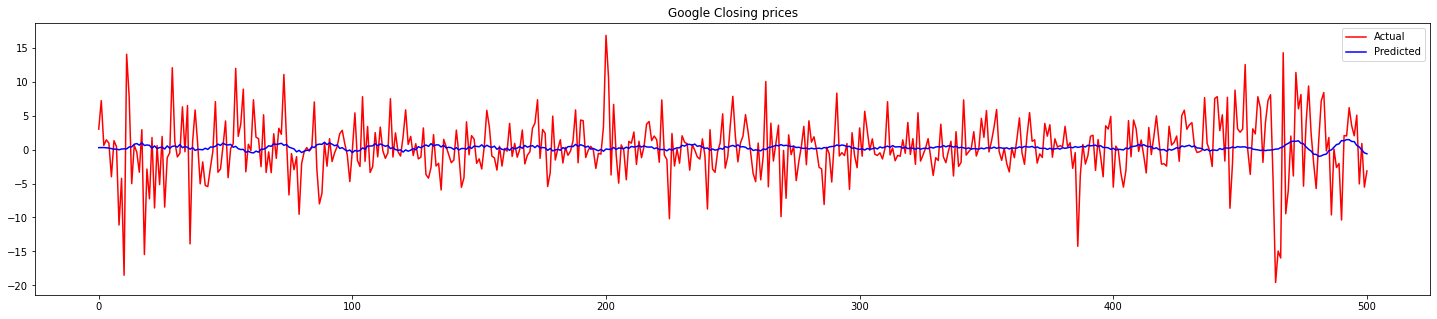

In [156]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Google Closing prices')
plt.show()

**Unobserved Components**

A UCM decomposes the response series into components such as trend, seasons, cycles, and the regression effects due to predictor series.

**Prediction**

                        Unobserved Components Results                         
Dep. Variable:                      y   No. Observations:                 3018
Model:                    local level   Log Likelihood              -10116.511
Date:                Thu, 09 Jun 2022   AIC                          20237.023
Time:                        04:33:08   BIC                          20249.047
Sample:                             0   HQIC                         20241.346
                               - 3018                                         
Covariance Type:                  opg                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
sigma2.irregular    47.7219      0.384    124.248      0.000      46.969      48.475
sigma2.level      5.033e-05      0.000      0.458      0.647      -0.000       0.000
Ljung-Box (Q):              

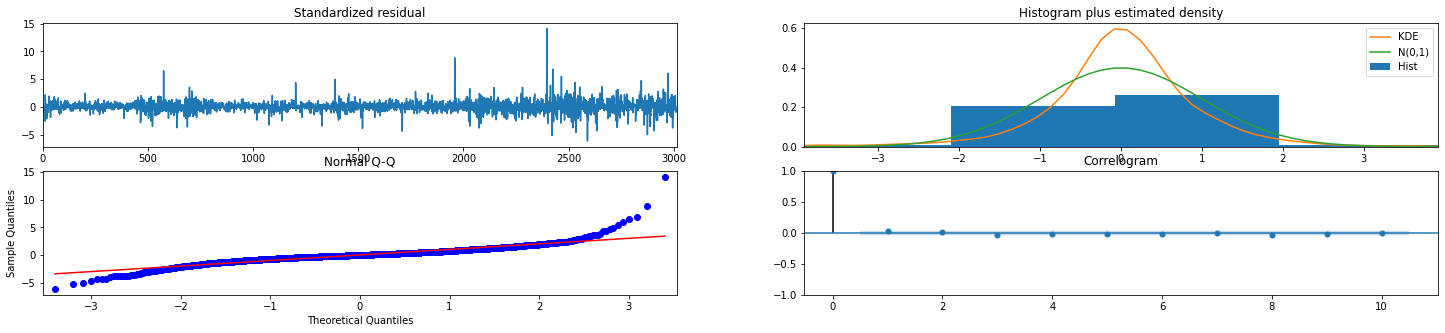

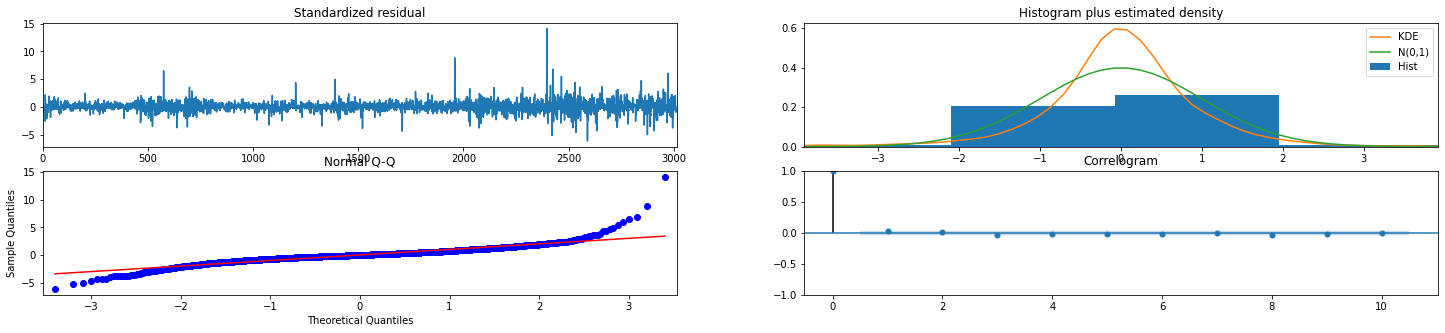

In [157]:
train_sample = google["Close"].diff().iloc[1:].values
model = sm.tsa.UnobservedComponents(train_sample,'local level')
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=500)
result.plot_diagnostics()

In [158]:
rmse = math.sqrt(mean_squared_error(train_sample[1:502], predicted_result))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 4.412418985322809.


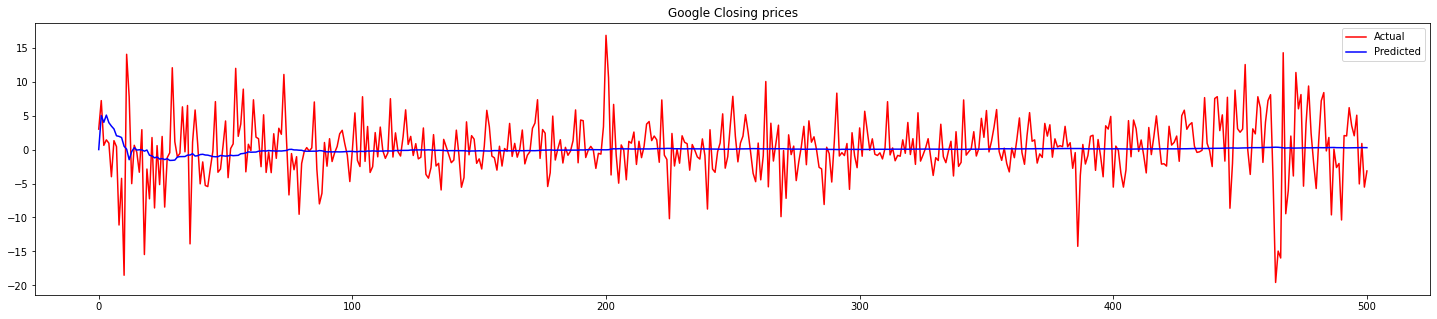

In [159]:
plt.plot(train_sample[1:502],color='red')
plt.plot(predicted_result,color='blue')
plt.legend(['Actual','Predicted'])
plt.title('Google Closing prices')
plt.show()

**Dynamic Factor Models**

Dynamic Factor Models are flexible models for multivariate time series in which the observed endogenous variables are linear functions of exogenous covariates and unobserved factors, which have a vector autoregressive structure. The unobserved factors may also be a function of exogenous covariates. The disturbances in the equations for the dependent variables may be autocorrelated.

**Prediction**

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                                   Statespace Model Results                                  
Dep. Variable:                    ['Close', 'Close']   No. Observations:                 3018
Model:             DynamicFactor(factors=1, order=2)   Log Likelihood              -12198.578
Date:                               Thu, 09 Jun 2022   AIC                          24409.156
Time:                                       04:34:41   BIC                          24445.230
Sample:                                            0   HQIC                         24422.128
                                              - 3018                                         
Covariance Type:                                 opg                                         
Ljung-Box (Q):                77.67, 95.04   Jarque-Bera (JB):   48193.36, 15037.45
Prob(Q):                        0.00, 0.00   Prob(JB):                   0.00, 0.00
Heteroskedasticity (H):         3.36, 1.62   Skew:                      1.14, -0

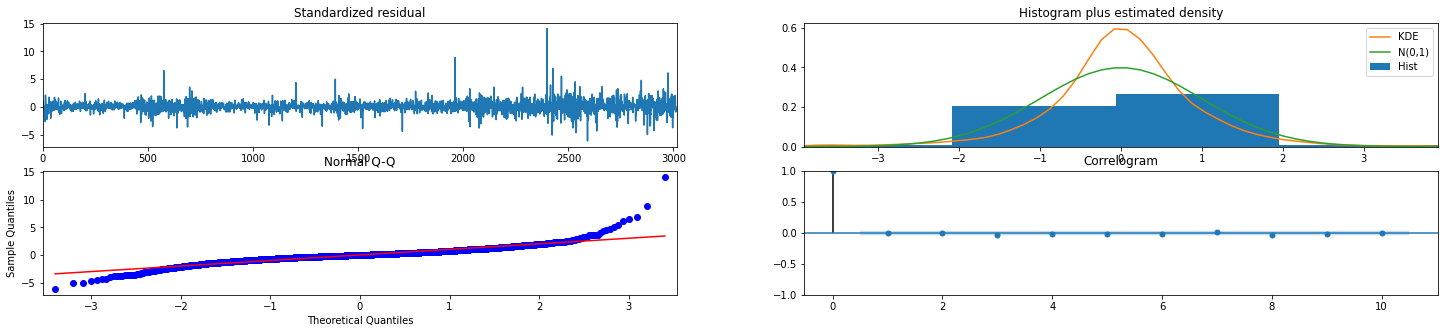

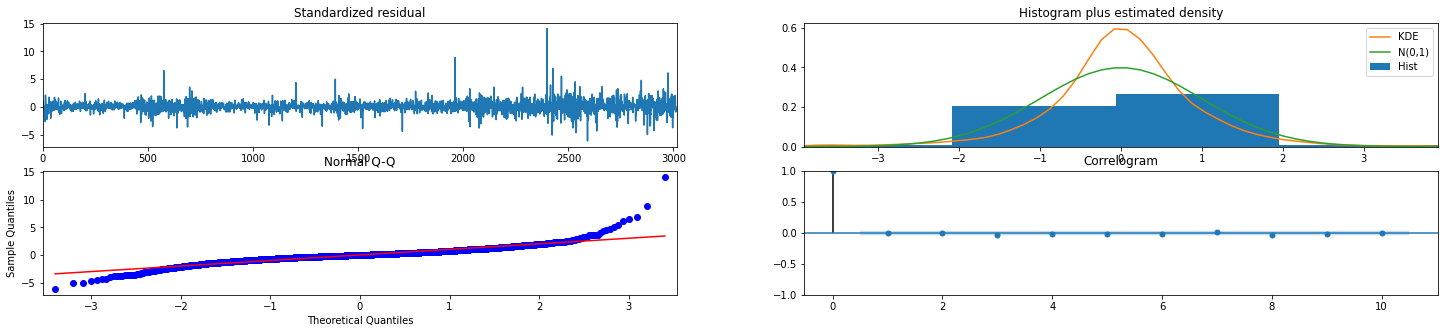

In [160]:
train_sample = pd.concat([google["Close"].diff().iloc[1:],microsoft["Close"].diff().iloc[1:]],axis=1)
model = sm.tsa.DynamicFactor(train_sample, k_factors=1, factor_order=2)
result = model.fit(maxiter=1000,disp=False)
print(result.summary())
predicted_result = result.predict(start=0, end=1000)
result.plot_diagnostics()

In [161]:
rmse = math.sqrt(mean_squared_error(train_sample.iloc[1:1002].values, predicted_result.values))
print("The root mean squared error is {}.".format(rmse))

The root mean squared error is 3.6822043895050665.
